# Understanding PCA by Python

In the tutorial ["Principal Component Analysis 4 Dummies: Eigenvectors, Eigenvalues and Dimension Reduction"](https://georgemdallas.wordpress.com/2013/10/30/principal-component-analysis-4-dummies-eigenvectors-eigenvalues-and-dimension-reduction/), the autors gave us a very intuitive understanding of PCA. In this post, we will use Python to demo their example in a qunatified way.

First of all, let's generate an ellipse.

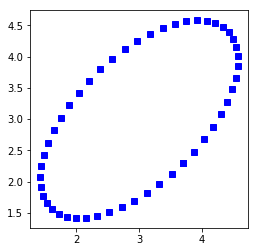

In [1]:
%matplotlib inline
from numpy.linalg import inv
import numpy as np
import matplotlib.pyplot as plt

def ellipse(t,a,b,alpha=0,center=(0,0)):
    """function to generate points on a speficied ellipse"""
    rotation = inv([[np.cos(alpha),-np.sin(alpha)],[np.sin(alpha),np.cos(alpha)]])
    b = np.array([a*np.cos(t),b*np.sin(t) ])
    return np.dot(rotation,b) + np.array(center)


a = 1
b = 2
center = (3,3)
alpha = 45 * np.pi / 180.0



points = []
N = 50
ax = plt.subplot(111)

for t in np.linspace(0,2 * np.pi, N):
    p = ellipse(t,a,b,alpha=alpha,center=center)
    points.append(p)
    plt.plot(p[0],p[1],'bs')

ax.axis('tight')
ax.set_aspect('equal')

plt.show()

The above python program produces an ellipse centered at (3,3). 

Then, let's get its principle components.

In [2]:
covariance = np.cov(np.array(points).transpose())
U,s,V = np.linalg.svd(covariance)
print(V)

[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]


We can see the first principle component is $[-0.70710678,-0.70710678]^T$ (i.e., $[1,1]^T$), the direction of 45 degree. And the second one lies at the direction of 135 degree. 

Let draw them out on the figure.

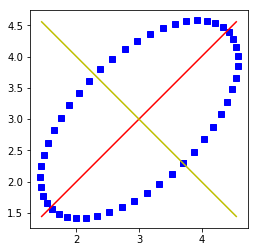

In [3]:
ax = plt.subplot(111)
for t in np.linspace(0,2 * np.pi, N):
    p = ellipse(t,a,b,alpha=alpha,center=center)
    points.append(p)
    plt.plot(p[0],p[1],'bs')

# the first principle component
t = np.linspace(-2.2,2.2,200)
x = center[0] + t * V[0][0]
y = center[1] + t * V[1][0]
plt.plot(x,y,'r-')

# the second 
x = center[0] + t * V[0][1]
y = center[1] + t * V[1][1]
plt.plot(x,y,'y-')

ax.axis('tight')
ax.set_aspect('equal')
plt.show()